In [1]:
import numpy as np
import pickle

from pyhhmm.gaussian import GaussianHMM
from pyhhmm.multinomial import MultinomialHMM
from pyhhmm.heterogeneous import HeterogeneousHMM
import pyhhmm.utils as hu

from scipy.optimize import linear_sum_assignment
from sklearn.metrics import pairwise_distances
%load_ext autoreload
%autoreload 2

In [2]:
adversity_hmm = GaussianHMM(n_states=4,
                            n_emissions=5, 
                            covariance_type='diagonal',
                            verbose = True)

states = ['Satisfied', 'Mild Frustration', 'High Frustration', 'Abandonment']
#transition
adversity_hmm.A = np.array([
    [0.80, 0.15, 0.04, 0.01],  # From Satisfied
    [0.20, 0.50, 0.25, 0.05],  # Mild Frustration
    [0.05, 0.20, 0.50, 0.25],  # High Frustration
    [0.00, 0.00, 0.00, 1.00]])  #Abondonned 

adversity_hmm.pi = np.array([0.6, 0.3, 0.1, 0.0])

stds = 0.5 * np.ones((4, 5))

#Emmision matrix
adversity_hmm.means = np.array([
    [100, 5, 0.1, 2, 300],  # Satisfied
    [150, 10, 1, 5, 150],   # Mild Frustration
    [200, 20, 3, 15, 60],   # High Frustration
    [0, 0, 0, 0, 0] ])        # Abandonment 

adversity_hmm.covars = 0.5 * np.ones((4, 5))

hu.pretty_print_hmm(adversity_hmm, hmm_type='Gaussian')

Priors
+--------------+--------------+--------------+--------------+
|     S_0      |     S_1      |     S_2      |     S_3      |
+--------------+--------------+--------------+--------------+
| P(S_0)=0.600 | P(S_1)=0.300 | P(S_2)=0.100 | P(S_3)=0.000 |
+--------------+--------------+--------------+--------------+
Transitions
+-----+------------------+------------------+------------------+------------------+
|  _  |       S_0        |       S_1        |       S_2        |       S_3        |
+-----+------------------+------------------+------------------+------------------+
| S_0 | P(S_0|S_0)=0.800 | P(S_1|S_0)=0.150 | P(S_2|S_0)=0.040 | P(S_3|S_0)=0.010 |
| S_1 | P(S_0|S_1)=0.200 | P(S_1|S_1)=0.500 | P(S_2|S_1)=0.250 | P(S_3|S_1)=0.050 |
| S_2 | P(S_0|S_2)=0.050 | P(S_1|S_2)=0.200 | P(S_2|S_2)=0.500 | P(S_3|S_2)=0.250 |
| S_3 | P(S_0|S_3)=0.000 | P(S_1|S_3)=0.000 | P(S_2|S_3)=0.000 | P(S_3|S_3)=1.000 |
+-----+------------------+------------------+------------------+------------------+

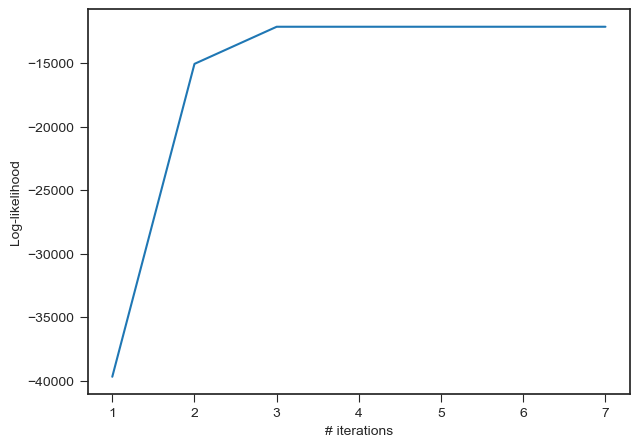

In [3]:
lengths = np.random.randint(25, 150, size=25)
X = [adversity_hmm.sample(n_sequences=1, n_samples=n_samples)[0] for n_samples in lengths]

trained_hmm = GaussianHMM(
    n_states = 4,
    n_emissions = 5,
    covariance_type='diagonal',
    verbose=False
)


trained_hmm, log_likelihoods = trained_hmm.train(
    X,
    n_init=1,  
    n_iter=10000, 
    conv_thresh=0.001, 
    conv_iter=5,  
    plot_log_likelihood=True,
    ignore_conv_crit=False,
    no_init=False,)

In [10]:
hu.pretty_print_hmm(trained_hmm, hmm_type='Gaussian')


Priors
+--------------+--------------+--------------+--------------+
|     S_0      |     S_1      |     S_2      |     S_3      |
+--------------+--------------+--------------+--------------+
| P(S_0)=0.280 | P(S_1)=0.000 | P(S_2)=0.560 | P(S_3)=0.160 |
+--------------+--------------+--------------+--------------+
Transitions
+-----+------------------+------------------+------------------+------------------+
|  _  |       S_0        |       S_1        |       S_2        |       S_3        |
+-----+------------------+------------------+------------------+------------------+
| S_0 | P(S_0|S_0)=0.344 | P(S_1|S_0)=0.151 | P(S_2|S_0)=0.258 | P(S_3|S_0)=0.247 |
| S_1 | P(S_0|S_1)=0.014 | P(S_1|S_1)=0.957 | P(S_2|S_1)=0.014 | P(S_3|S_1)=0.014 |
| S_2 | P(S_0|S_2)=0.168 | P(S_1|S_2)=0.081 | P(S_2|S_2)=0.632 | P(S_3|S_2)=0.118 |
| S_3 | P(S_0|S_3)=0.206 | P(S_1|S_3)=0.250 | P(S_2|S_3)=0.172 | P(S_3|S_3)=0.372 |
+-----+------------------+------------------+------------------+------------------+

In [11]:
predicted_states = trained_hmm.predict(X[0])
print("Predicted states:\n", predicted_states)

Predicted states:
 [array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0,

In [6]:
from hmmlearn import hmm
import numpy as np 
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
np.random.seed(42)

model  = hmm.GaussianHMM( n_components = 3, init_params = '', covariance_type="full",  random_state= 4)

model.startprob_= np.array([0.3, 0.3, 0.4])
model.transmat_= np.array([
    [0.5, 0.2, 0.3],
    [0.2, 0.6, 0.2],
    [0.2, 0.3, 0.5] ]) 

model.means_ = np.array( [[3.0], [10.0], [20.0] ])
model.covars_ = np.array([[[1.0]], [[2.0]], [[3.0]]])

n_samples = 100
trials, simulated_states = model.sample(n_samples)
predicted_states = model.predict(trials)

print(trials[:10])

X_train = trials[:trials.shape[0] //2]
X_test = trials[trials.shape[0] // 2:]

#model.fit(X_train)

experiment_observations = np.array([[13.0],[0.0],[1.0],[15],[1.0],[10.0], [10.0], [12.0], [9], [0.1], [20.0], [23.0]])

predicted_states_obs = model.predict(experiment_observations)
print("Predict the Hidden State Transitions that were being : \n 0 -> Engaged  , "
      "1 -> Confused, 2 - Frustrated")
print(predicted_states_obs)



[[20.78004901]
 [20.07794518]
 [22.5142893 ]
 [ 2.66118802]
 [19.16008817]
 [19.79100093]
 [ 9.74487253]
 [ 3.20218012]
 [10.7429343 ]
 [ 8.94303421]]
Predict the Hidden State Transitions that were being : 
 0 -> Engaged  , 1 -> Confused, 2 - Frustrated
[1 0 0 2 0 1 1 1 1 0 2 2]


In [7]:
from hmmlearn import hmm
import numpy as np 
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
np.random.seed(42)

model  = hmm.GaussianHMM( n_components = 3, init_params = '', covariance_type="full",  random_state= 4)

model.startprob_= np.array([0.3, 0.3, 0.4])

#  Transition Probs: 0 - Engaged; 1 - Confused; 2 - Frustrated.
model.transmat_= np.array([
    [0.5, 0.2, 0.3], 
    [0.2, 0.6, 0.2],
    [0.2, 0.3, 0.5] ]) 

#first column is mouse clicks let's say and second one (0.1, 0.3, 0.5) are error rates 
model.means_  = np.array([[3.0,  0.1], 
                         [10.0, 0.3], 
                         [20.0, 0.5] ])
model.covars_ = np.array([ [[1.0, 0.05], [0.05, 0.02]],
                           [[2.0, 0.10], [0.10, 0.05]], 
                           [[3.0, 0.20], [0.20, 0.10]]])

n_samples = 100

trials, simulated_states = model.sample(n_samples)
trials[:, 0] = np.random.poisson(lam=trials[:, 0]).astype(int)
trials[:, 1] = np.clip(trials[:, 1], 0, 1)

predicted_states = model.predict(trials)

print(trials[:10])

X_train = trials[:trials.shape[0] //2]
X_test = trials[trials.shape[0] // 2:]


model.fit(X_train)

experiment_observations = np.array([[13.0, 0.4], [0.0, 0.1], [1.0, 0.2],
                                    [15.0, 0.5], [1.0, 0.1], [10.0, 0.3],
                                    [10.0, 0.4], [12.0, 0.5],[9.0, 0.3], 
                                    [0.0, 0.05], [20.0, 0.6],[23.0, 0.7]])

predicted_states_obs = model.predict(experiment_observations)

print("\nPredicted Hidden State Transitions:")
print(predicted_states_obs)



[[22.          0.45964749]
 [16.          0.82164065]
 [19.          0.22814685]
 [ 0.          0.        ]
 [ 4.          0.10875466]
 [16.          0.40066903]
 [19.          0.5806915 ]
 [ 3.          0.20518074]
 [18.          0.        ]
 [17.          0.63280949]]

Predicted Hidden State Transitions:
[2 0 0 2 0 1 1 1 1 0 2 2]


[1 0 0 2 0 1 1 1 1 0 2 2]

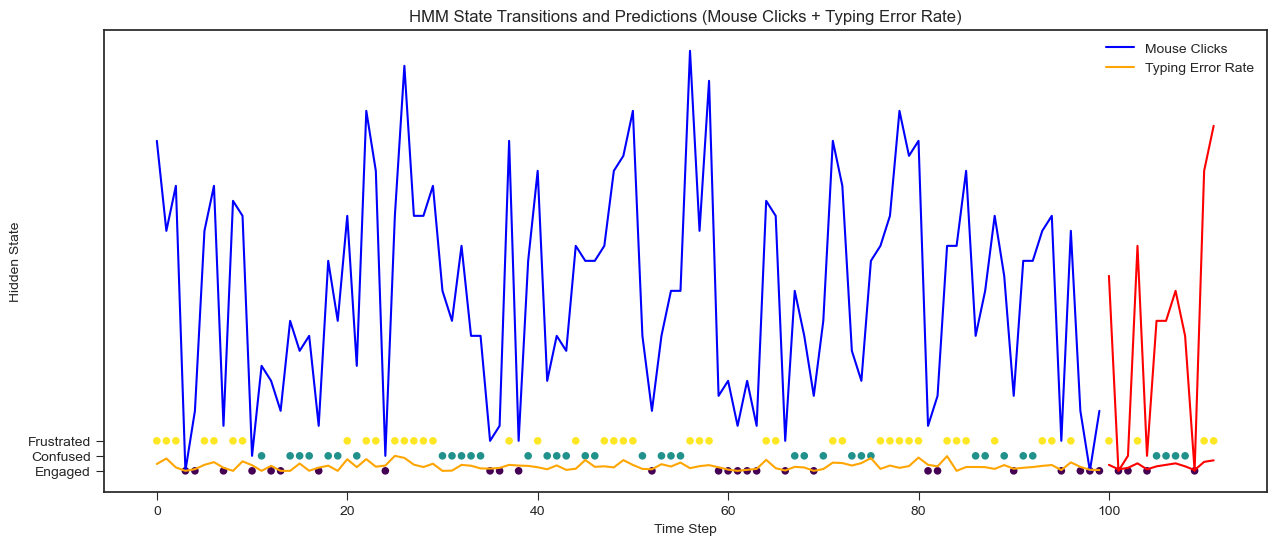

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(range(n_samples), trials[:, 0], label='Mouse Clicks', color='blue')
plt.plot(range(n_samples), trials[:, 1], label='Typing Error Rate', color='orange')

plt.plot(
    range(n_samples, n_samples + len(experiment_observations)),
    experiment_observations[:, 0], 
    color='red'
)
plt.plot(
    range(n_samples, n_samples + len(experiment_observations)),
    experiment_observations[:, 1], 
    color='red'
)
plt.scatter(range(n_samples), predicted_states, c=predicted_states, cmap='viridis', s=20)
plt.scatter(
    range(n_samples, n_samples + len(predicted_states_obs)),
    predicted_states_obs,
    c=predicted_states_obs,
    cmap='viridis',
    s=20
)

plt.yticks([0, 1, 2], ['Engaged', 'Confused', 'Frustrated'])
plt.title('HMM State Transitions and Predictions (Mouse Clicks + Typing Error Rate)')
plt.xlabel('Time Step')
plt.ylabel('Hidden State')
plt.legend()
plt.show()

In [9]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import pairwise_distances

def align_states(true_means, recovered_means):
    """
    Align recovered HMM state indices to true state indices based on means.
    Returns permutation indices and reordered arrays.
    """
    # Compute cost matrix (distance between state means)
    cost_matrix = pairwise_distances(true_means, recovered_means)

    # Hungarian algorithm: find best assignment
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    return col_ind  # This tells you: true state i ↔ recovered_state[col_ind[i]]

def reorder_hmm_parameters(recovered_model, alignment_indices):
    """
    Reorders the parameters of a recovered HMM to match the true model.
    """
    reordered = {}
    reordered['means'] = recovered_model.means_[alignment_indices]
    reordered['covars'] = recovered_model.covars_[alignment_indices]
    reordered['startprob'] = recovered_model.startprob_[alignment_indices]
    reordered['transmat'] = recovered_model.transmat_[alignment_indices][:, alignment_indices]
    return reordered


In [10]:
recovery_model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100, random_state=42)
recovery_model.fit(X_train)

print("\n✅ Parameter Recovery Results")

print("\nTrue means:")
print(model.means_)
print("Recovered means:")
print(recovery_model.means_)

print("\nTrue covariances:")
print(model.covars_)
print("Recovered covariances:")
print(recovery_model.covars_)

print("\nTrue transition matrix:")
print(model.transmat_)
print("Recovered transition matrix:")
print(recovery_model.transmat_)

print("\nTrue start probabilities:")
print(model.startprob_)
print("Recovered start probabilities:")
print(recovery_model.startprob_)



✅ Parameter Recovery Results

True means:
[[ 2.06523597  0.21942346]
 [ 8.68373148  0.16595124]
 [18.19633507  0.46830994]]
Recovered means:
[[12.59087491  0.3764215 ]
 [14.68089949  0.28163335]
 [ 2.00017972  0.27422372]]

True covariances:
[[[ 1.46035122 -0.01441141]
  [-0.01441141  0.01599163]]

 [[ 8.99412136  0.07121897]
  [ 0.07121897  0.02791319]]

 [[11.2448026   0.2379242 ]
  [ 0.2379242   0.06655176]]]
Recovered covariances:
[[[ 3.75130979e+01  1.27723126e+00]
  [ 1.27723126e+00  9.48056806e-02]]

 [[ 3.58660703e+01  7.92954105e-01]
  [ 7.92954105e-01  4.61529346e-02]]

 [[ 6.68785893e-01 -5.03026250e-02]
  [-5.03026250e-02  9.49731215e-03]]]

True transition matrix:
[[0.20788196 0.17120537 0.62091267]
 [0.09336463 0.70101285 0.20562252]
 [0.20943968 0.16112489 0.62943544]]
Recovered transition matrix:
[[9.98294491e-27 1.00000000e+00 2.03209365e-11]
 [7.27360776e-01 2.09930428e-22 2.72639224e-01]
 [9.99998883e-01 1.11204857e-06 4.84505530e-09]]

True start probabilities:
[0.

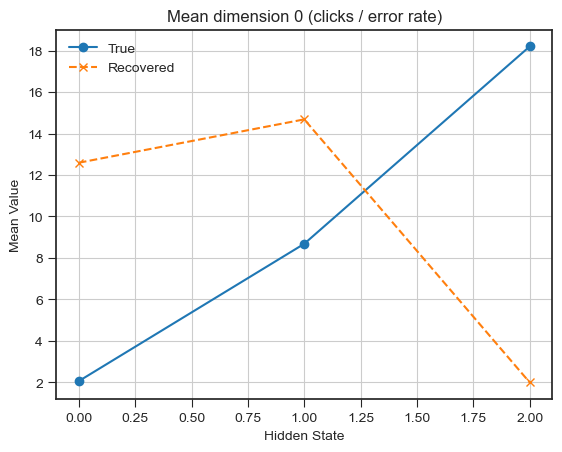

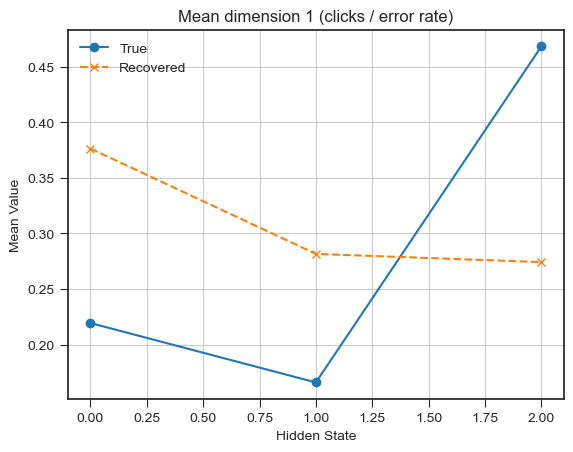

In [11]:
import matplotlib.pyplot as plt

for dim in range(model.means_.shape[1]):
    plt.figure()
    plt.title(f"Mean dimension {dim} (clicks / error rate)")
    plt.plot(model.means_[:, dim], 'o-', label="True")
    plt.plot(recovery_model.means_[:, dim], 'x--', label="Recovered")
    plt.xlabel("Hidden State")
    plt.ylabel("Mean Value")
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
# Step 1: Align states
alignment = align_states(model.means_, recovery_model.means_)

# Step 2: Reorder
reordered = reorder_hmm_parameters(recovery_model, alignment)

# Step 3: Print comparison
print("True means:\n", model.means_)
print("Recovered (aligned) means:\n", reordered['means'])


True means:
 [[ 2.06523597  0.21942346]
 [ 8.68373148  0.16595124]
 [18.19633507  0.46830994]]
Recovered (aligned) means:
 [[ 2.00017972  0.27422372]
 [12.59087491  0.3764215 ]
 [14.68089949  0.28163335]]
